<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPITULO 6 - HANDS ON MACHINE LEARNING
## Árboles de decisión

En este capitulo el libro estudia los arboles de decision, cuenta que pueden ser usados como clasificadores y tambien como regresores. Ademas dice que son, obviamente, el lugar de partida para luego armar un algoritmo tipo "Random forest", el cual es uno de los metodos mas versatiles y potentes de ML en la actualidad.
Para entender como funciona un arbol el libro propone implementar uno rapidamente (sobre la base de datos IRIS, igual que en el capitulo anterior) e intentar visualizar su forma.

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
[0 1 2]


Text(0, 0.5, 'petal width (cm)')

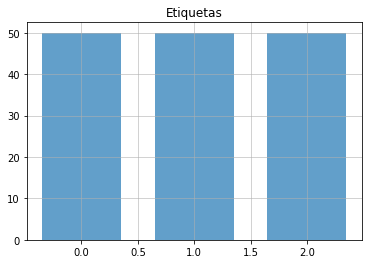

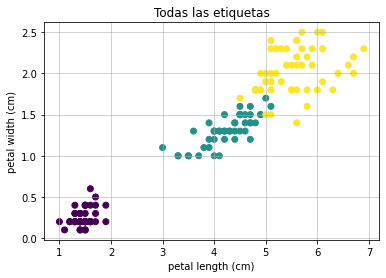

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris_data = datasets.load_iris()
df_iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
print(df_iris.head())
etiquetas = df_iris['target'].unique()
print(etiquetas)
hist_max,bin_edges = np.histogram(df_iris['target'], bins=3, range=(0, 3))
plt.bar(bin_edges[:-1], hist_max, width = 0.7,alpha=0.7,label='Etiquetas')
plt.grid(axis="both", alpha=0.7)
plt.title('Etiquetas')

plt.figure()
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c=df_iris["target"])
plt.grid(axis="both", alpha=0.7)
plt.title("Todas las etiquetas")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [2]:
X = df_iris[["petal length (cm)","petal width (cm)"]].copy()
y = df_iris[["target"]].copy()
print(X.head())
print(y.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2
   target
0       0
1       0
2       0
3       0
4       0


Implemento un arbol de decision para clasificar las 3 clases del problema. 
En este paso originalmente habia usado un Pipeline (linea comentada), pero al hacer esto luego no podia graficar la estructura del arbol usando export_graphviz. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2)
#arbol_clf = Pipeline([("scaler", StandardScaler()),("Arbol", DecisionTreeClassifier(max_depth=2)),])
arbol_clf = DecisionTreeClassifier(max_depth=2)
arbol_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'SGD')

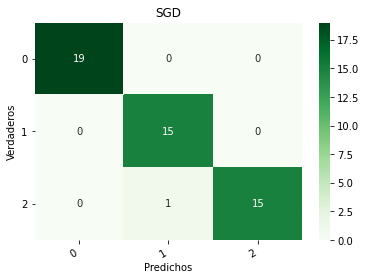

In [4]:
from sklearn.metrics import confusion_matrix
y_test_pred = arbol_clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

import seaborn as sns
import pandas as pd
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Verdaderos')
  plt.xlabel('Predichos');
clases = ('0','1','2')

df_cm = pd.DataFrame(cm, index=clases, columns=clases)
plt.figure()
show_confusion_matrix(df_cm)
plt.title('SGD')

Parece funcionar bastante bien el clasificador. Veamos las metricas y luego grafiquemos las clases en funcion de las variables (lo podemos hacer facil porque es en 2D).

In [5]:
from sklearn.metrics import precision_score, recall_score, classification_report 
reporte = classification_report(y_test, y_test_pred, target_names=clases)
print(reporte)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Text(0, 0.5, 'petal width (cm)')

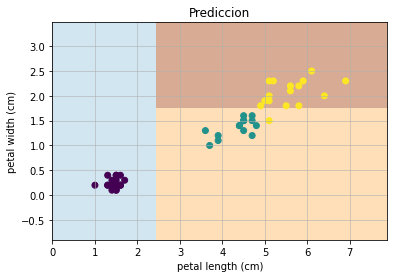

In [6]:
h = .02     
x_min, x_max = X["petal length (cm)"].min() - 1, X["petal length (cm)"].max() + 1
y_min, y_max = X["petal width (cm)"].min() - 1, X["petal width (cm)"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = arbol_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(X_test["petal length (cm)"],X_test["petal width (cm)"],c=y_test['target'])
plt.grid(axis="both", alpha=0.7)
plt.title("Prediccion")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

Las metricas de este sistema clasificador son muy buenas, sin embargo al ver las regiones que encuentra para cada clase nos hace cuestionar cuanto esta capturando del problema. Veamos si podemos visualizar la estructura del arbol y entender por que clasifico de esta forma.

In [7]:
X_test.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(arbol_clf,out_file="./iris_tree.dot",feature_names=X.columns,class_names=['0','1','2'],rounded=True,filled=True)

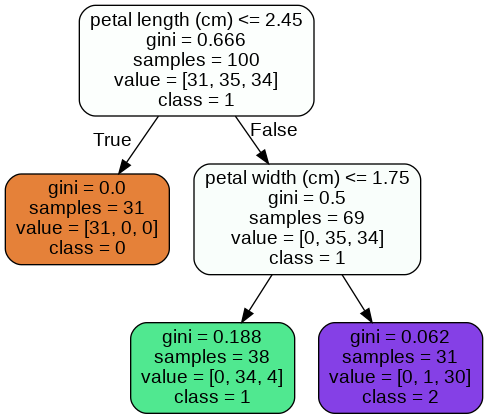

In [9]:
!dot -Tpng iris_tree.dot -o iris_tree.png
from IPython.display import Image
Image('iris_tree.png')

El diagrama anterior nos permite ver la estructura de decision del arbol. Tal como pusimos, la maxima profunidad de decision es igual a $2$, lo que significa que puede hacerse hasta $2$ "preguntas consecutivas". Otra cosa que notamos es que las decisiones se toman de a una variable por vez. En particular el metodo de decision utilizado es mediante el calculo de gini (en este caso). Mas adelante vamos a discutir con mayor profundidad el criterio de gini y otro donde se utiliza la entropia como criterios de decision. Cada recuadro nos muestra ademas la cantidad de elementos de cada clase. Esta informacion esta en el vector "values". Esto nos permite estimar la "probabilidad" de que una instancia pertenezca a una determinada clase.

## Estimando la probabilidad de las clases

Como dijimos recien, podemos calcular la "probabilidad" de cada instancia segun la cantidad de elementos (del conjunto de train) que fueron clasificados en cada decision. Supongamos que tenemos una hoja con 38 samples y un vector de valores $(0,34,4)$. Esto significa que $0$ elementos de la clase $0$ terminaron en esta hoja, $34$ de la clase $1$ y $4$ de la clase $2$. En tal caso se puede calcular la probabilidad de que una instancia que cae en esta hoja sea de cada una de las clases como $P_0=\dfrac{0}{38}=0$, $P_1=\dfrac{34}{38}=0.89$ y   $P_2=\dfrac{4}{38}=0.1$. 




In [10]:
print(arbol_clf.predict_proba([[5, 1.5]])) 
print(arbol_clf.predict([[5, 1.5]]))

[[0.         0.89473684 0.10526316]]
[1]


## El algoritmo CART
Sklearn utiliza el algortimo CART (Classification and regression tree) para armar el modelo de arboles. EL funcionamiento del algoritmo es bastante sencillo de describir. Lo que busca es dividir en cada proceso de decision el conjunto de entrenamiento en dos (dado un atributo $k$), buscando maximizar la "pureza" (pesada por el tamaño de los conjuntos) utilizando un valor umbral $t_k$. Esta condicion se puede escribir como:

$J(k,t_k)=\dfrac{m_{izq}G_{izq}}{m} + \dfrac{m_{der}G_{der}}{m}$

Donde $G_i$ mide la pureza del conjunto $i$, $m_i$ la cantidad de instancias del conjunto y $m$ la cantidad de instancias totales que esta intentando dividir. Ante cada decision repite este proceso de division. El algoritmo se detiene cuando llega, por ejemplo, a la maxima profunidad seleccionada aunque existen otros criterios de stop para utilizar. Una cosa que es importante notar sobre el algoritmo es que va aplicando este proceso de division sobre los datos "de a pasos". Esto significa que no optimiza el proceso sobre el conjunto completo de los datos. Este metodo por lo tanto no garantiza la solucion optima (segun este mismo criterio) pero en general funciona razonablemente bien.
